In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
# reading the dataset

zomato_real = pd.read_csv("F:\python\I neuron\zomato/zomato.csv")
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [4]:
# Deleting unnecessary columns

zomato = zomato_real.drop(['url', 'dish_liked','phone'], axis = 1)

In [5]:
# remove the duplicates

zomato.duplicated().sum()
zomato.drop_duplicates(inplace = True)
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [7]:
# drop the columns

zomato.dropna(how = 'any', inplace = True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
address                        43499 non-null object
name                           43499 non-null object
online_order                   43499 non-null object
book_table                     43499 non-null object
rate                           43499 non-null object
votes                          43499 non-null int64
location                       43499 non-null object
rest_type                      43499 non-null object
cuisines                       43499 non-null object
approx_cost(for two people)    43499 non-null object
reviews_list                   43499 non-null object
menu_item                      43499 non-null object
listed_in(type)                43499 non-null object
listed_in(city)                43499 non-null object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [8]:
zomato.columns

Index([u'address', u'name', u'online_order', u'book_table', u'rate', u'votes',
       u'location', u'rest_type', u'cuisines', u'approx_cost(for two people)',
       u'reviews_list', u'menu_item', u'listed_in(type)', u'listed_in(city)'],
      dtype='object')

In [9]:
zomato = zomato.rename(columns = {'approx_cost(for two people)':'cost', 'listed_in(type)':'type','listed_in(city)':'city'})
zomato.columns

Index([u'address', u'name', u'online_order', u'book_table', u'rate', u'votes',
       u'location', u'rest_type', u'cuisines', u'cost', u'reviews_list',
       u'menu_item', u'type', u'city'],
      dtype='object')

In [10]:
# Transformations

zomato['cost'] = zomato['cost'].astype(str)

zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))

zomato['cost'] = zomato['cost'].astype(float)

zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
address         43499 non-null object
name            43499 non-null object
online_order    43499 non-null object
book_table      43499 non-null object
rate            43499 non-null object
votes           43499 non-null int64
location        43499 non-null object
rest_type       43499 non-null object
cuisines        43499 non-null object
cost            43499 non-null float64
reviews_list    43499 non-null object
menu_item       43499 non-null object
type            43499 non-null object
city            43499 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [11]:
# unique value

zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
# removing '/5' from rates

zomato = zomato.loc[zomato.rate != 'NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop = True)
remove_slash = lambda x: x.replace('/5','') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [15]:
# Adjust the column names

zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True,False),inplace = True)
zomato.book_table.replace(('Yes','No'),(True,False),inplace = True)

zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [19]:
# Encode the input variables

def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate','cost','votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


Index([u'address', u'name', u'online_order', u'book_table', u'rate', u'votes',
       u'location', u'rest_type', u'cuisines', u'cost', u'reviews_list',
       u'menu_item', u'type', u'city'],
      dtype='object')

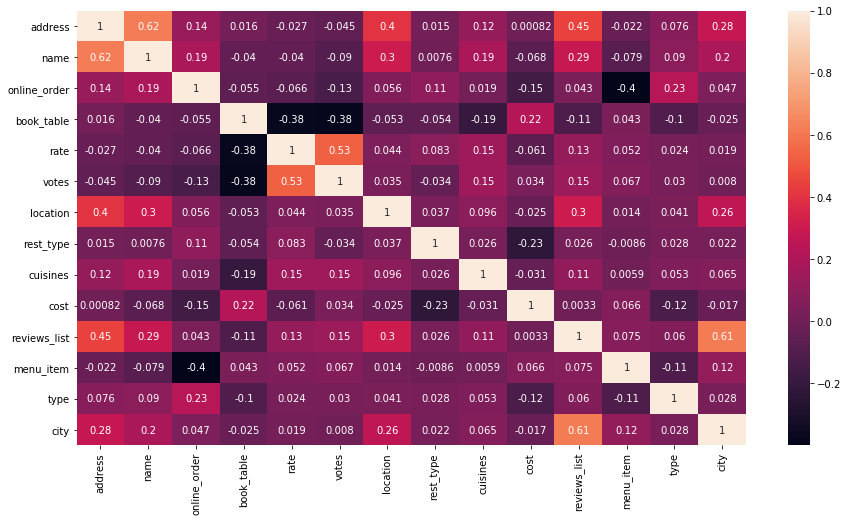

In [20]:
# correlation different variable

corr = zomato_en.corr(method = 'kendall')
plt.figure(figsize = (15,8))
sns.heatmap(corr,annot = True)
zomato_en.columns

## Spliting the Dataset

In [22]:
# independent variable and dependent variable

x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

In [23]:
# train_test_split data

X_train,X_test,y_train,y_test = train_test_split(x, y,test_size = 1, random_state=353)
X_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
11326,0,1,159,15,2,1554,400.0,0
37469,0,1,80,76,4,10,500.0,0
25963,0,1,76,29,12,26,500.0,5022
31170,1,1,5,1,2,33,150.0,0
12437,0,0,188,37,28,819,1.3,0


In [24]:
y_train.head()

11326    4.0
37469    4.1
25963    4.0
31170    3.4
12437    4.0
Name: rate, dtype: float64

In [25]:
# seeing the unique value in 'meu_item'

zomato_en['menu_item'].unique()

array([   0,    1,    2, ..., 8240, 8241, 8242], dtype=int64)

In [26]:
zomato_en['location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91], dtype=int64)

In [27]:
zomato_en['cuisines'].unique()

array([   0,    1,    2, ..., 2364, 2365, 2366], dtype=int64)

In [29]:
zomato_en['rest_type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86], dtype=int64)

In [30]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,0,0,775,0,0,0,800.0,0
1,0,1,787,0,0,1,800.0,0
2,0,1,918,0,1,2,800.0,0
3,1,1,88,0,2,3,300.0,0
4,1,1,166,1,0,4,600.0,0


In [31]:
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

## Data Visualization

Text(0.5,1,'Restaurants delivering online or Not')

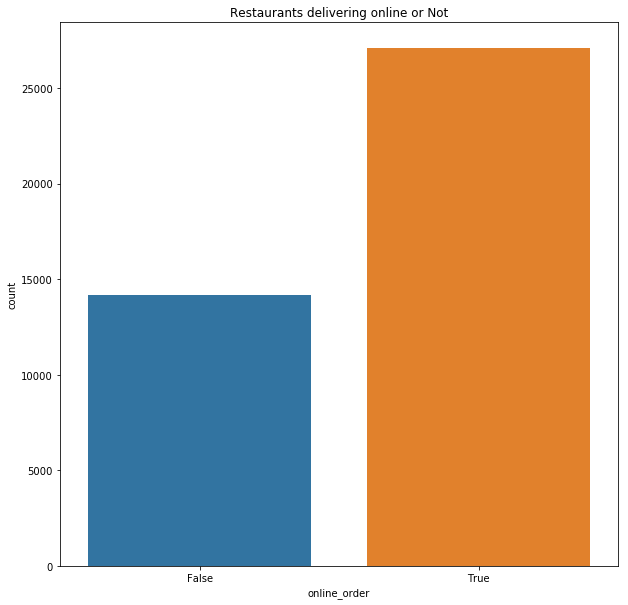

In [32]:
# Restaurant delivering online or not

sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Text(0.5,1,'Restaurants allowing table Booking or not')

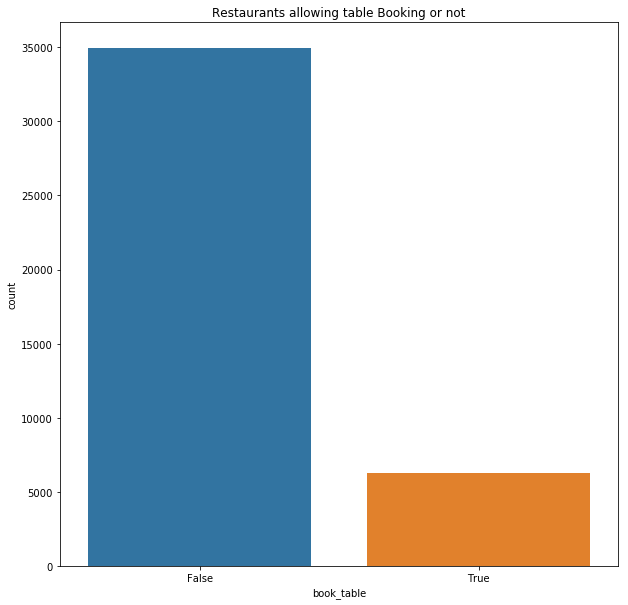

In [34]:
# Restaurants allowing table booking or not

sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table Booking or not')

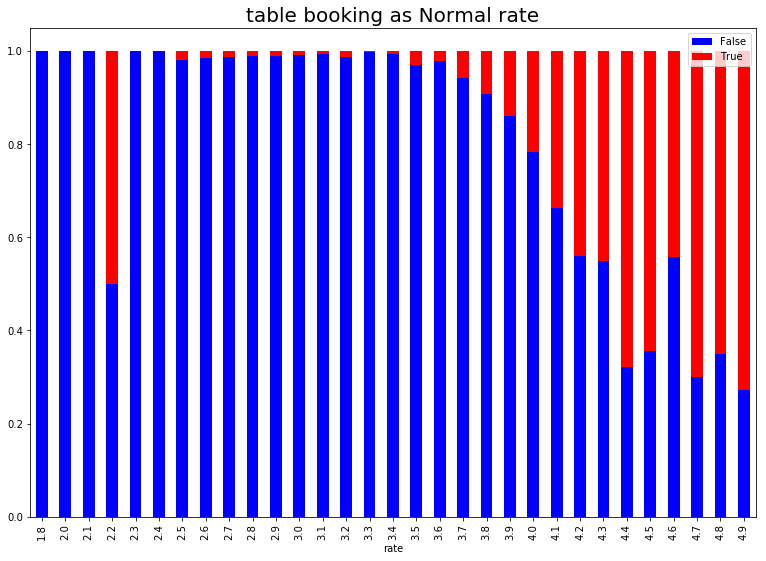

In [40]:
# table booking vs Normal rate

plt.rcParams['figure.figsize'] = (13,9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['blue','red'])

plt.title('table booking as Normal rate', fontweight = 30, fontsize = 20)

plt.legend(loc = "upper right")
plt.show()

Text(0.5,1,'location wise count for restaurantes')

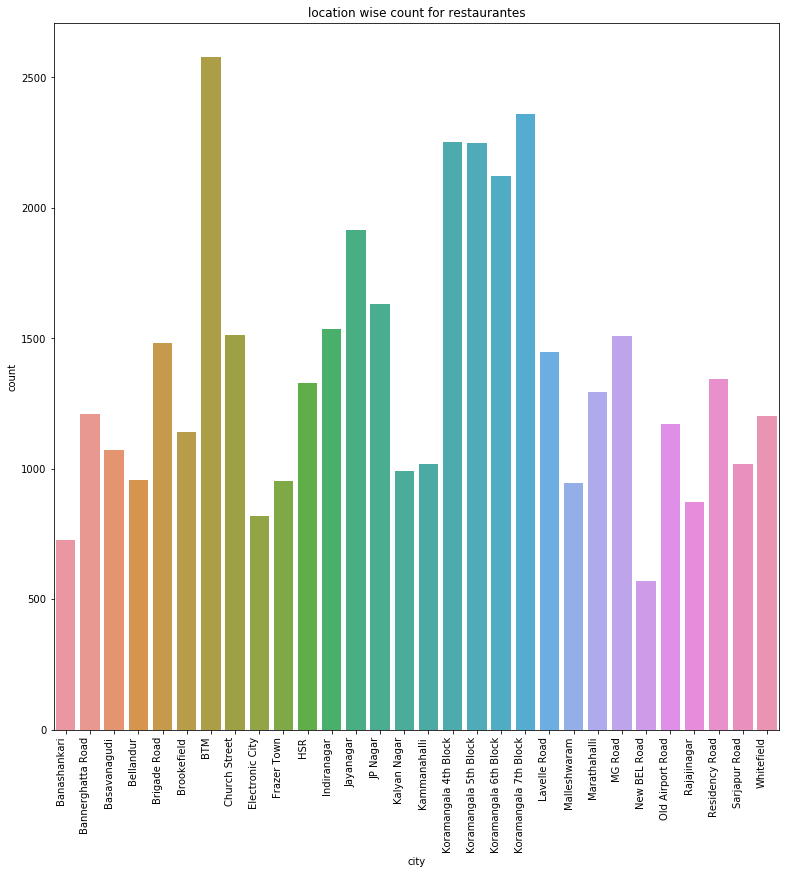

In [41]:
# Location

sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation = 90, ha="right")

fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('location wise count for restaurantes')

<function matplotlib.pyplot.legend>

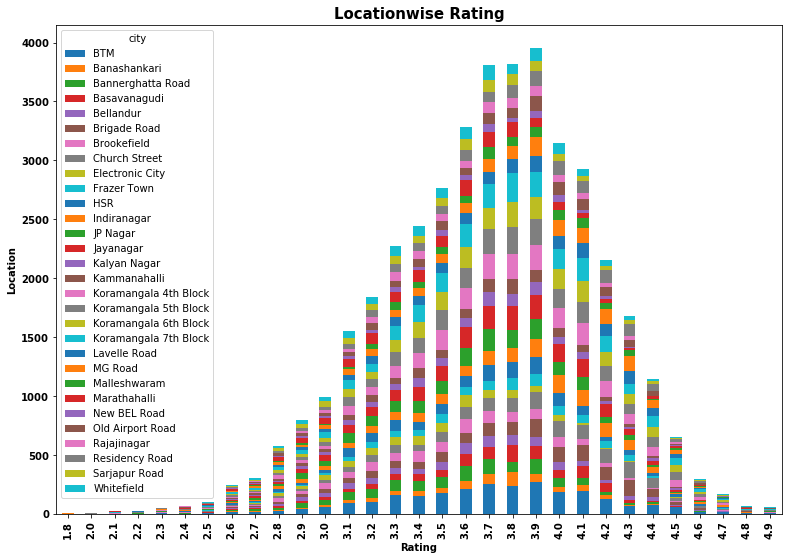

In [43]:
# Location and Rating

loc_plt = pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind = 'bar', stacked = True)
plt.title('Locationwise Rating',fontsize=15,fontweight = 'bold')
plt.ylabel('Location', fontsize = 10, fontweight = 'bold')
plt.xlabel('Rating', fontsize = 10, fontweight = 'bold')

plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')

plt.legend

Text(0.5,1,'Restaurant Type')

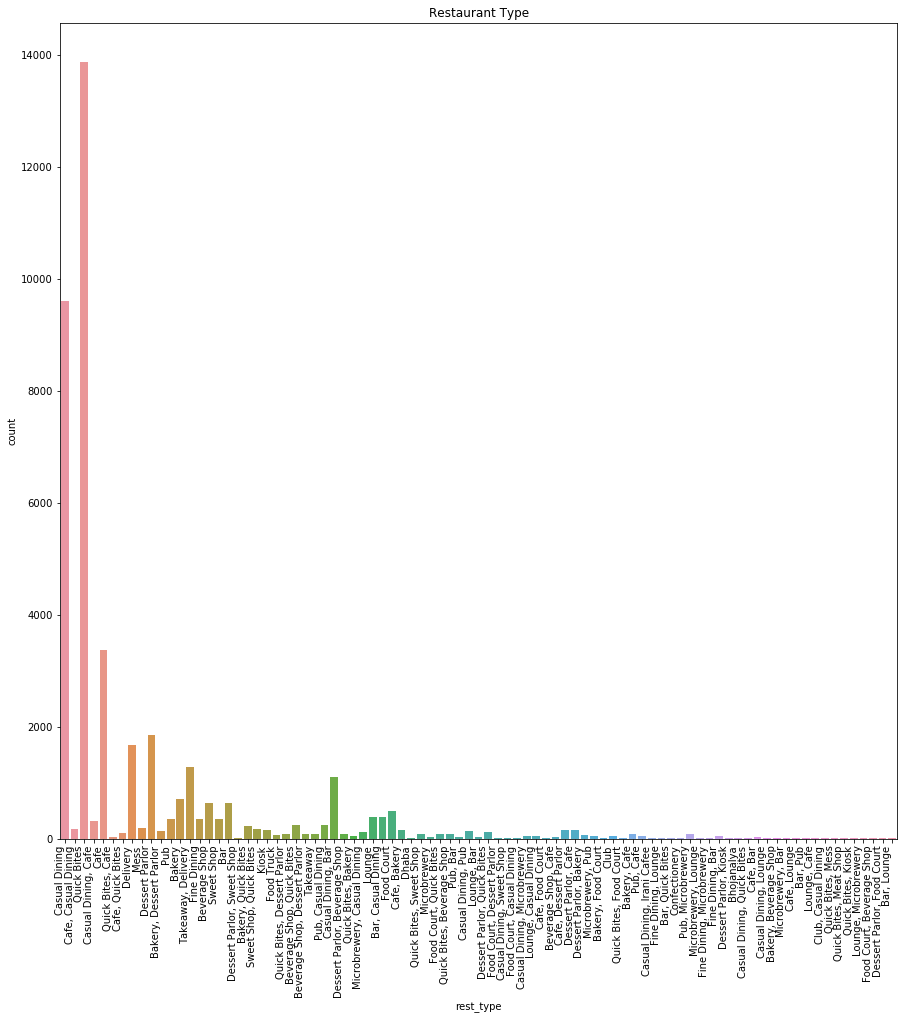

In [44]:
# Restaurant Type

sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(),
                                                  rotation = 90, ha = "right")
fig = plt.gcf()
fig.set_size_inches(15,15)

plt.title('Restaurant Type')

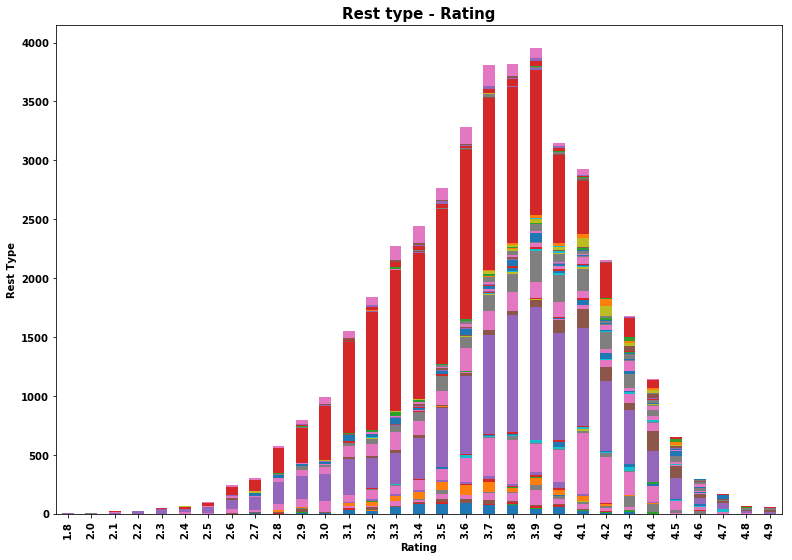

In [45]:
# Gaussian Rest type and Rating

loc_plt = pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt.plot(kind = 'bar',stacked = True)
plt.title('Rest type - Rating', fontsize=15,fontweight = 'bold')
plt.ylabel('Rest Type', fontsize = 10, fontweight = 'bold')
plt.xlabel('Rating', fontsize = 10, fontweight = 'bold')

plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')

plt.legend().remove()

Text(0.5,1,'Type of Service')

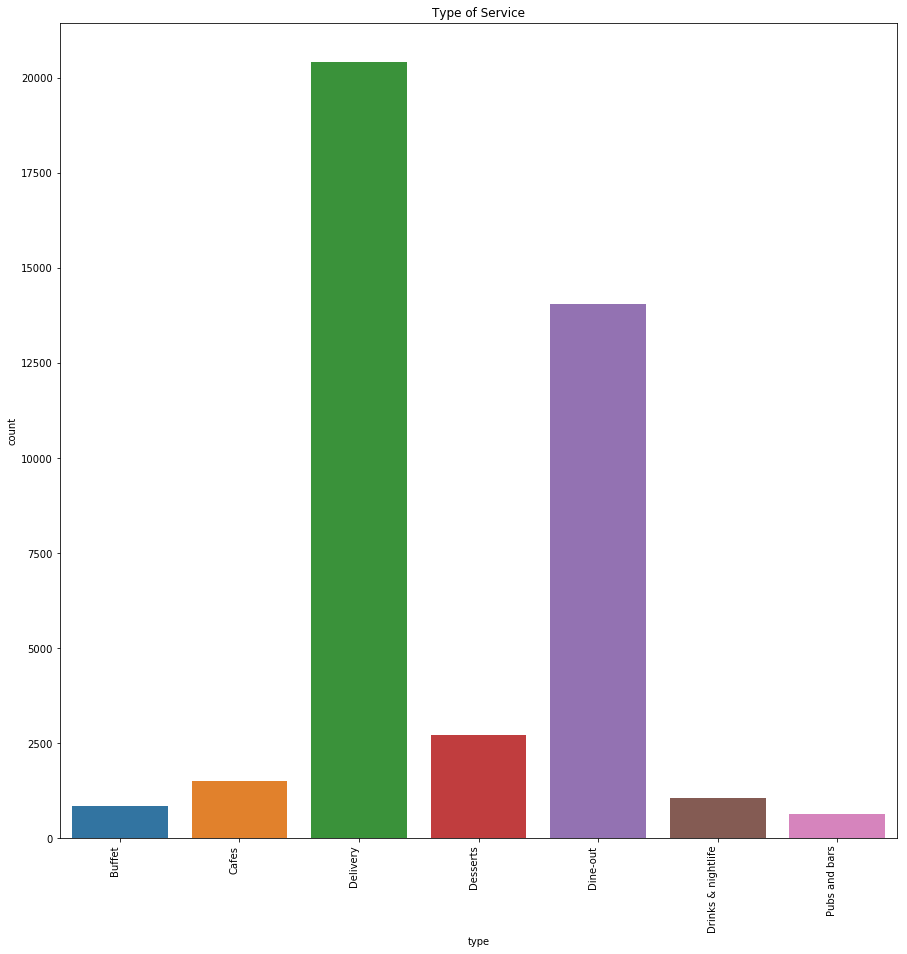

In [49]:
# Type of servies

sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation = 90, ha = "right")

fig = plt.gcf()
fig.set_size_inches(15,15)

plt.title('Type of Service')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text yticklabel objects>)

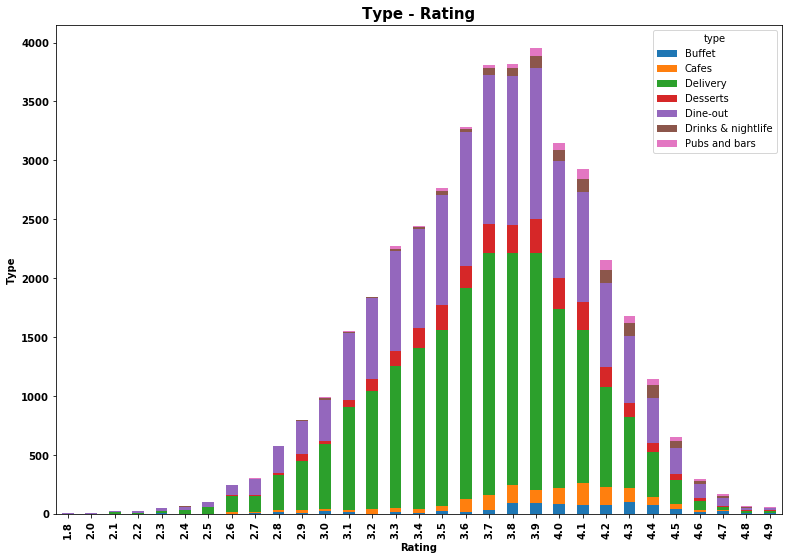

In [50]:
# Type and Rating

type_plt = pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind = 'bar', stacked = True)

plt.title('Type - Rating',fontsize=15,fontweight = 'bold')
plt.ylabel('Type', fontsize = 10, fontweight = 'bold')
plt.xlabel('Rating', fontsize = 10, fontweight = 'bold')

plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')

Text(0.5,1,'Cost of Restuarant')

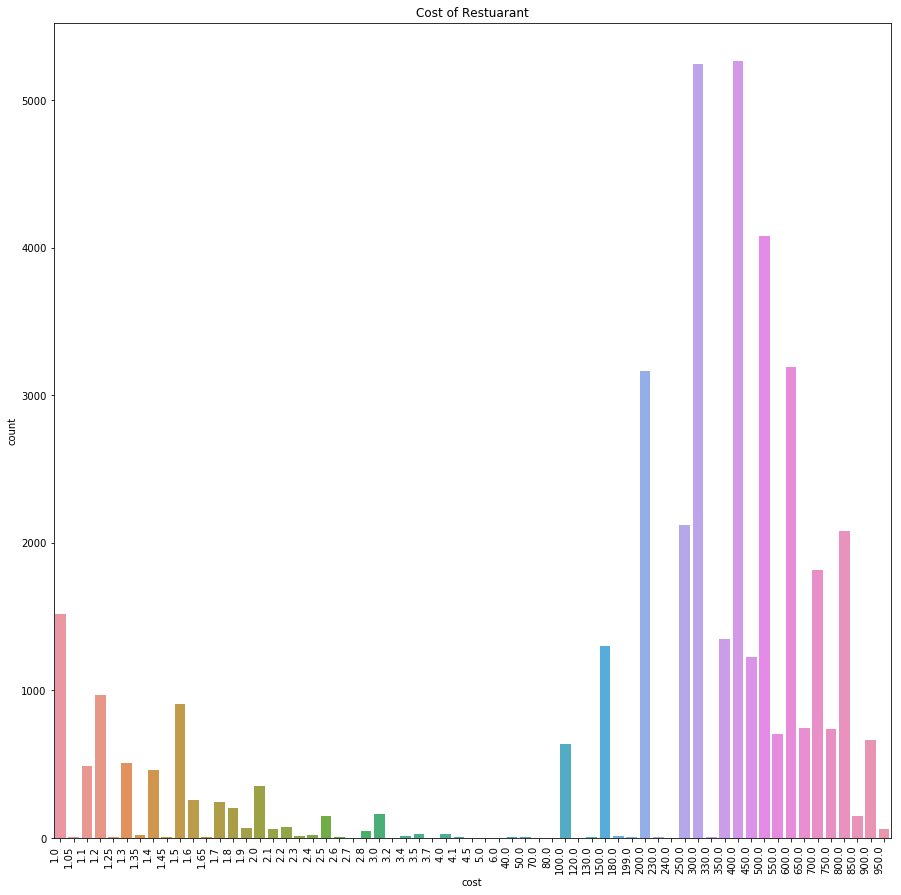

In [51]:
# Cost of Restaurant

sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation = 90, ha = "right")

fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5,1,' No. of restaurants in a location')

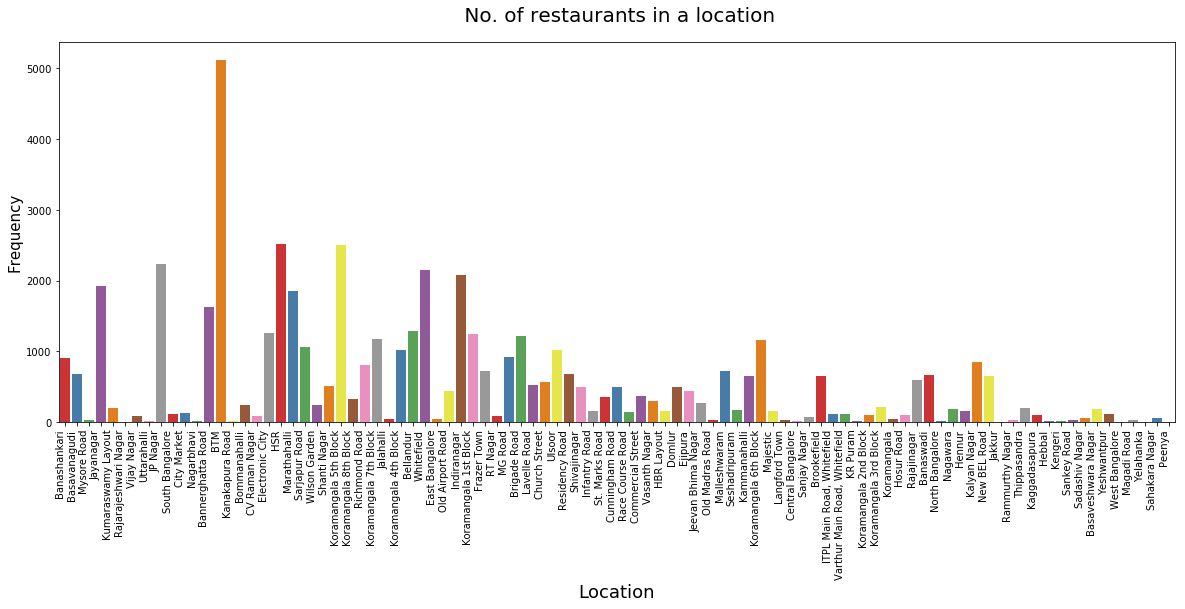

In [55]:
# No of Restaurante in a Location

fig = plt.figure(figsize = (20,7))
loc = sns.countplot(x= "location", data = zomato_real, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation = 90, ha = "right")

plt.ylabel("Frequency", size = 15)
plt.xlabel("Location", size = 18)

plt.title (' No. of restaurants in a location',size = 20, pad = 20)

Text(0.5,1,'Restaurants type')

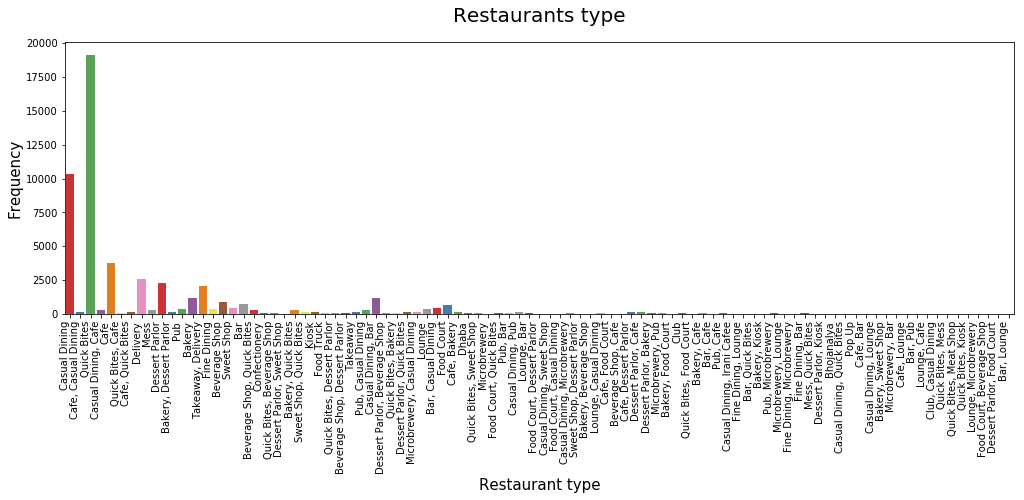

In [56]:
# Restaurante type

fig = plt.figure(figsize = (17,5))
loc = sns.countplot(x= "rest_type", data = zomato_real, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation = 90, ha = "right")

plt.ylabel("Frequency", size = 15)
plt.xlabel("Restaurant type", size = 15)

plt.title ('Restaurants type',size = 20, pad = 20)

Text(0.5,0,'Number of outlets')

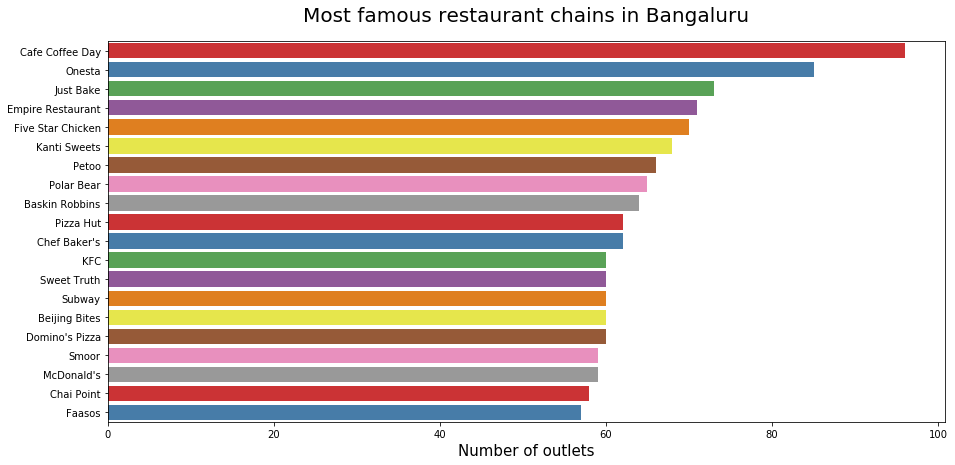

In [59]:
# Most famous Restaurant chains in Bengaluru

plt.figure(figsize = (15,7))
chains = zomato_real['name'].value_counts()[:20]
sns.barplot(x=chains, y=chains.index, palette = 'Set1')
plt.title("Most famous restaurant chains in Bangaluru",size = 20, pad = 20)
plt.xlabel("Number of outlets", size = 15)

## Linear Regression

In [61]:
# Linear regression Model

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.0

## Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1, random_state = 105)

Dtree = DecisionTreeRegressor(min_samples_leaf = .0001)
Dtree.fit(x_train, y_train)
y_predict = Dtree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

1.0

## Random Forest Regression



In [65]:
from sklearn.ensemble import RandomForestRegressor

RForest = RandomForestRegressor(n_estimators = 500, random_state = 329, min_samples_leaf = .0001)
RForest.fit(x_train,y_train)
y_predict = RForest.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.0

## Extra Tree Regressor

In [69]:
from sklearn.ensemble import ExtraTreesRegressor

ETree = ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict = ETree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

1.0